Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.36188148 0.74922846]
 [0.95275167 0.0057884 ]
 [0.95877775 0.31480131]]
[-0.30449277 -0.51747291  0.91803906  0.33040591  0.17266964]
[37 15  7 53 83 76 25 21 42 41]
[4 1 8]
[-1.45897978 -0.02429405  0.99526038  1.30205991  0.14888111 -0.43517624
 -0.37085984  0.95239463  0.43120779 -1.47261415]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [6]:
import pandas as pd
import time
import numpy as np

start_time_pandas = time.time()
df_pandas = pd.DataFrame({'data': pd.Series(np.random.randint(1, 101, size=1000000))})
end_time_pandas = time.time()


time_taken_pandas = end_time_pandas - start_time_pandas
print(f"Pandas Time Taken: {time_taken_pandas} seconds")



start_time_numpy = time.time()
np_array = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()


time_taken_numpy = end_time_numpy - start_time_numpy
print(f"NumPy Time Taken: {time_taken_numpy} seconds")

Pandas Time Taken: 0.023184537887573242 seconds
NumPy Time Taken: 0.011855125427246094 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [7]:
# Write your code for AIM #2 here
import pandas as pd
import time
import numpy as np

start_time = time.time()
df = pd.read_csv('sleep_health.csv')

mean_values = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas Mean Values:\n", mean_values)


correlation = df.select_dtypes(include='number').corr()
print("Pandas Correlation:\n", correlation)

std_sleep_duration = df['Sleep Duration'].std()
print("Pandas Standard Deviation of Sleep Duration:", std_sleep_duration)

pandas_time = time.time() - start_time
print(f"Pandas total time: {pandas_time:.4f} seconds")


# Loading the CSV file as an array in NumPy
start_time = time.time()
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)


mean_sleep_duration = np.mean(data['Sleep_Duration'])
mean_systolic_bp = np.mean(data['Systolic_blood_pressure'])
mean_diastolic_bp = np.mean(data['Diastolic_blood_pressure'])
mean_heart_rate = np.mean(data['Heart_Rate'])
mean_daily_steps = np.mean(data['Daily_Steps'])

print("NumPy Mean Values:")
print("Sleep Duration:", mean_sleep_duration)
print("Systolic Blood Pressure:", mean_systolic_bp)
print("Diastolic Blood Pressure:", mean_diastolic_bp)
print("Heart Rate:", mean_heart_rate)
print("Daily Steps:", mean_daily_steps)

correlation_matrix = np.corrcoef([data['Sleep_Duration'], data['Systolic_blood_pressure'], 
                                   data['Diastolic_blood_pressure'], data['Heart_Rate'], 
                                   data['Daily_Steps']])
print("NumPy Correlation:\n", correlation_matrix)

std_sleep_duration_numpy = np.std(data['Sleep_Duration'])
print("NumPy Standard Deviation of Sleep Duration:", std_sleep_duration_numpy)

numpy_time = time.time() - start_time
print(f"NumPy total time: {numpy_time:.4f} seconds")





# Calculate the correlation in NumPy using np.corrcoef()

# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]


# Use np-std() to calculate Standard deviation



Pandas Mean Values:
 Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
Pandas Correlation:
                           Person ID       Age  Sleep Duration  \
Person ID                  1.000000  0.990516        0.296305   
Age                        0.990516  1.000000        0.344709   
Sleep Duration             0.296305  0.344709        1.000000   
Quality of Sleep           0.431612  0.473734        0.883213   
Physical Activity Level    0.149882  0.178993        0.212360   
Stress Level              -0.394287 -0.422344       -0.811023   
Systolic blood pressure    0.611551  0.605878       -0.180406   
Diastolic blood pressure   0.590670  0.593839       -0.166570   
Heart Rate                -0.225467 -0.225606       -0.516455   
Daily Steps                0.043844  0.057973       -0.039533   

                          Q

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

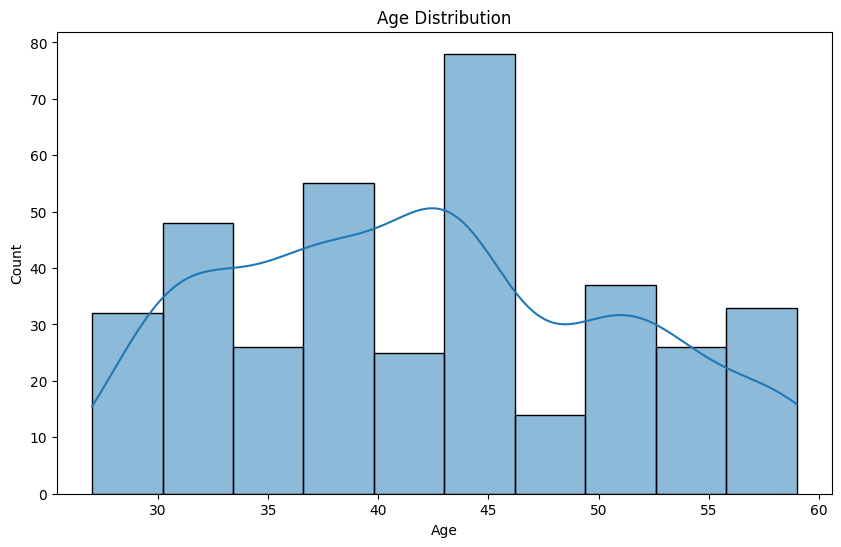

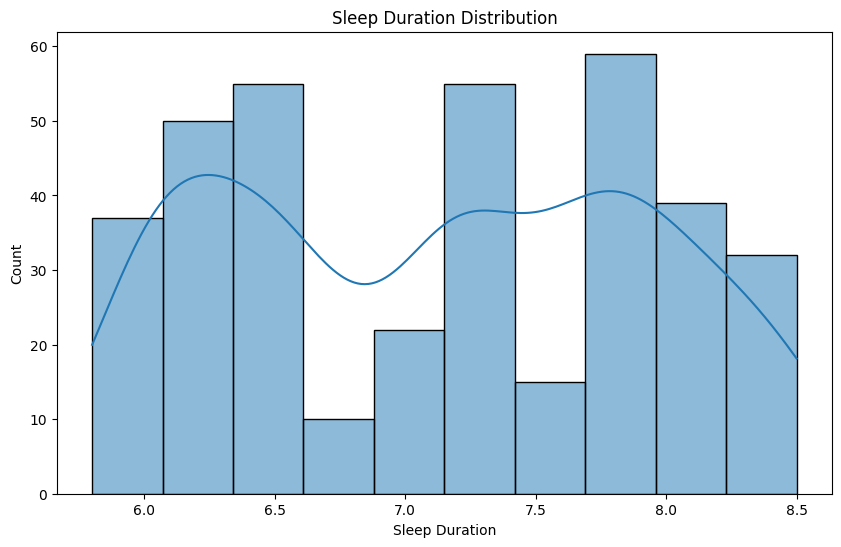

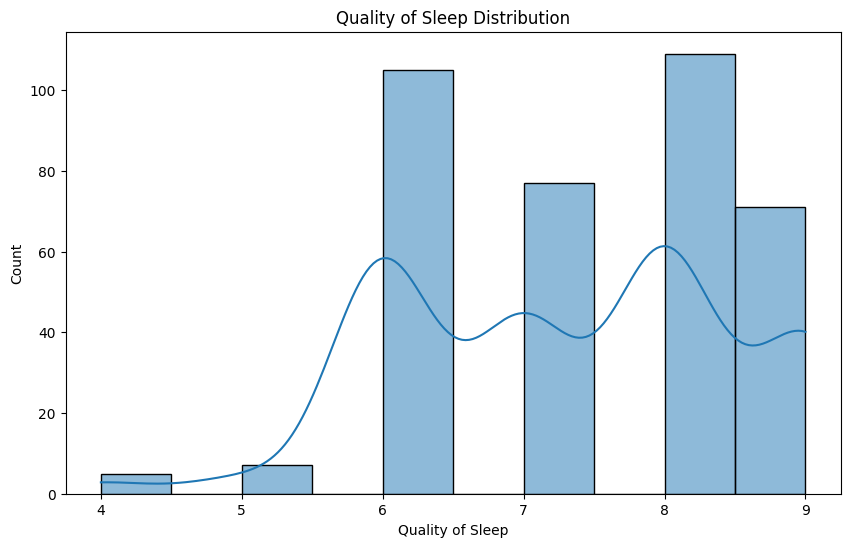

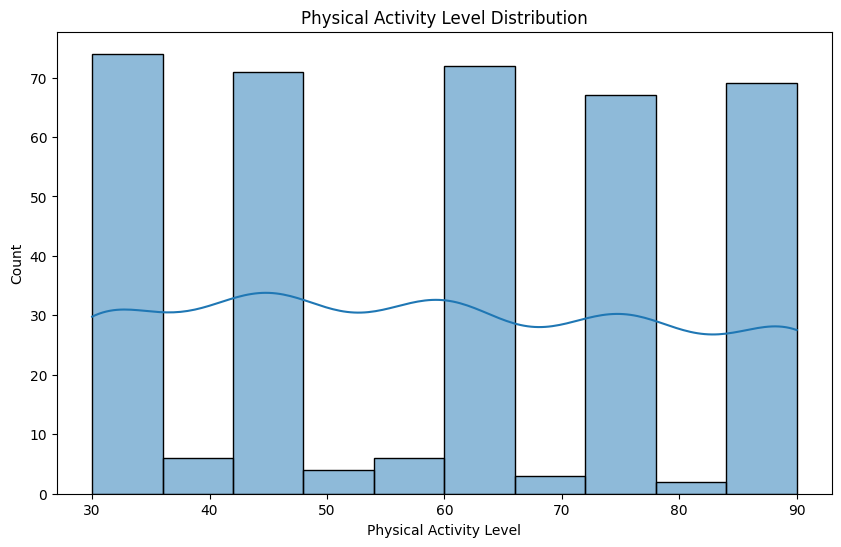

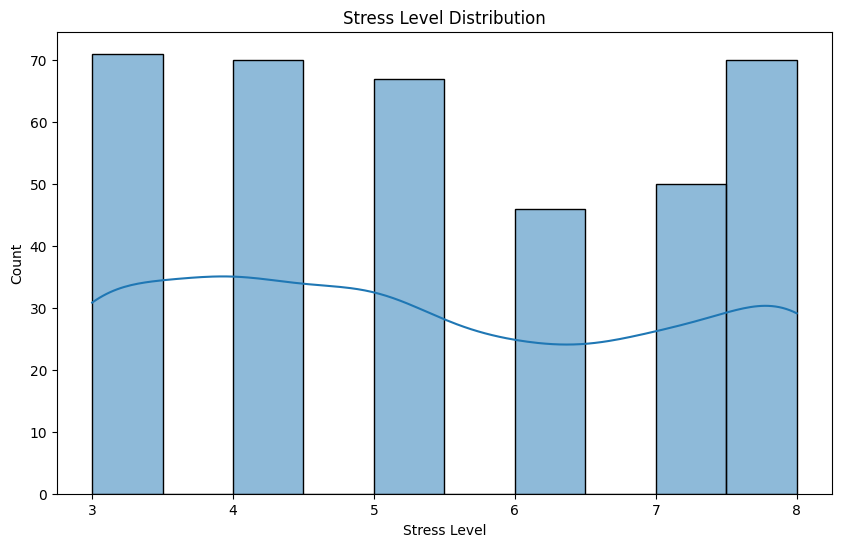

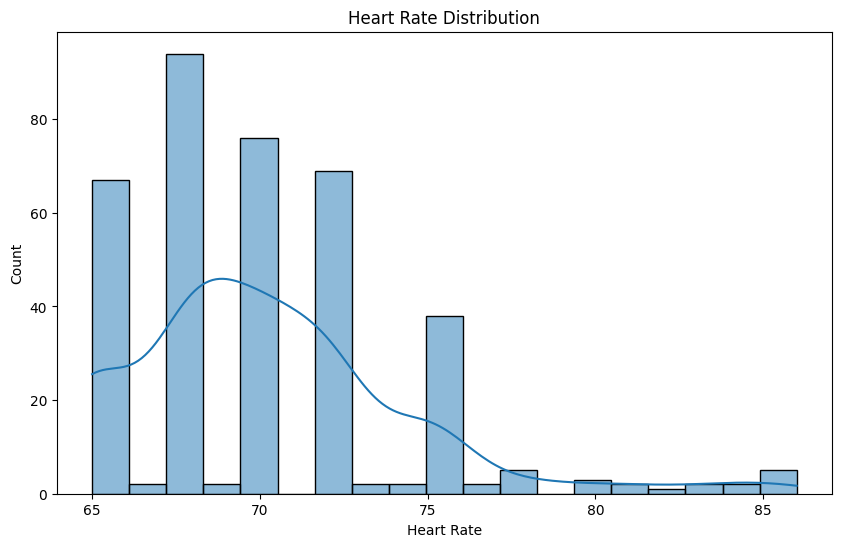

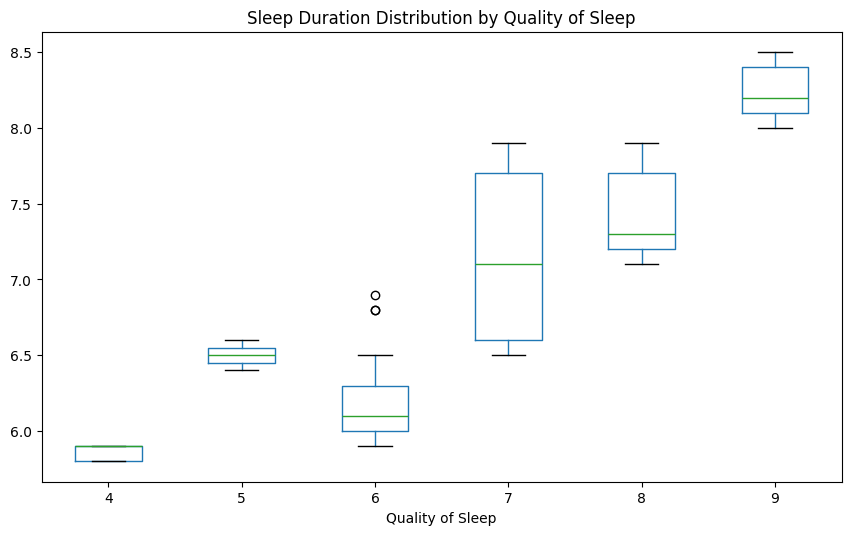

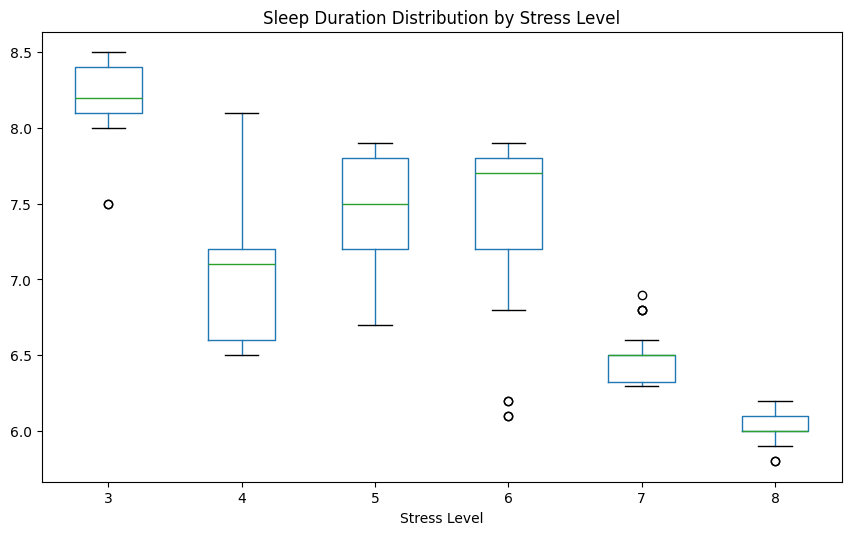

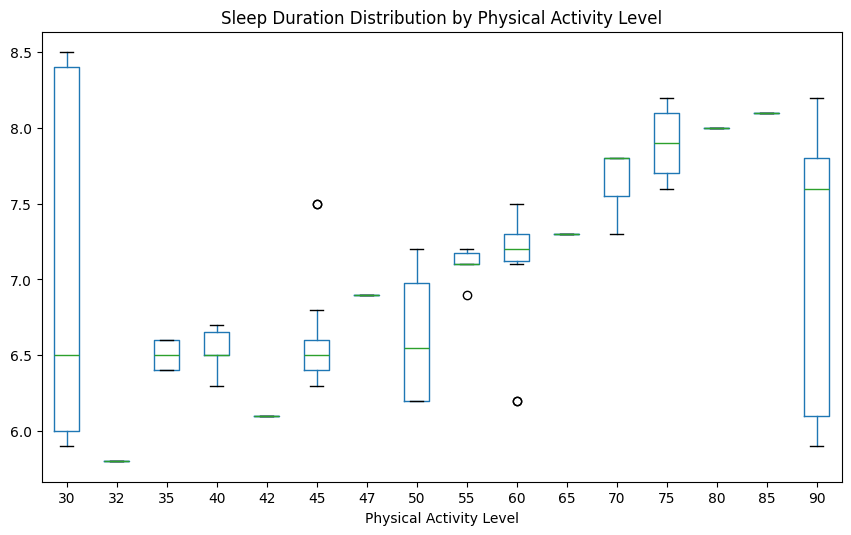

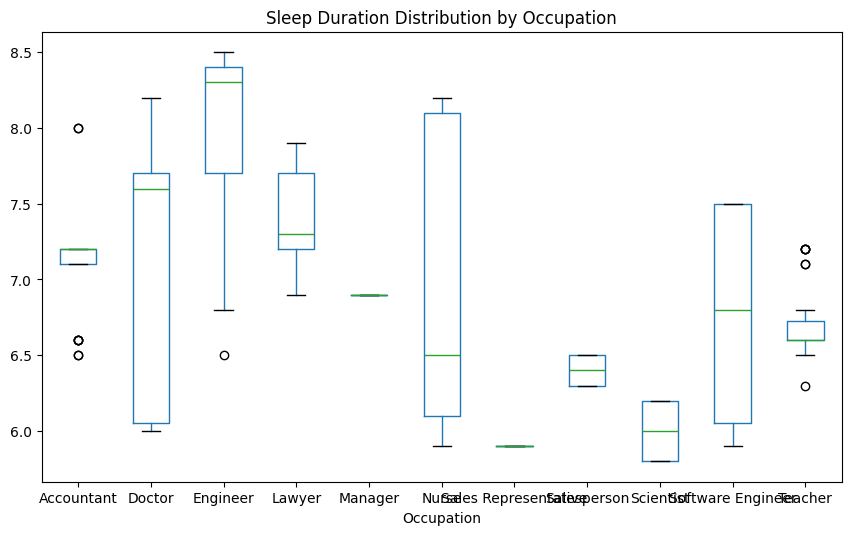

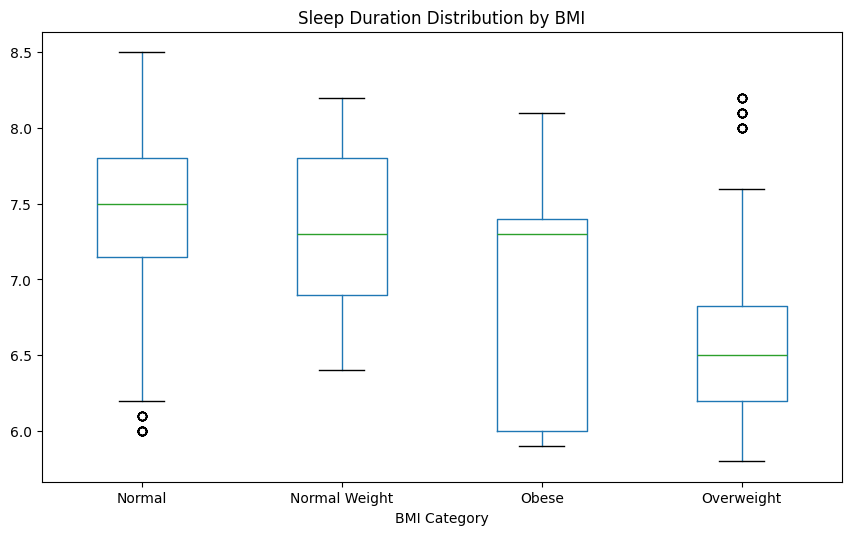

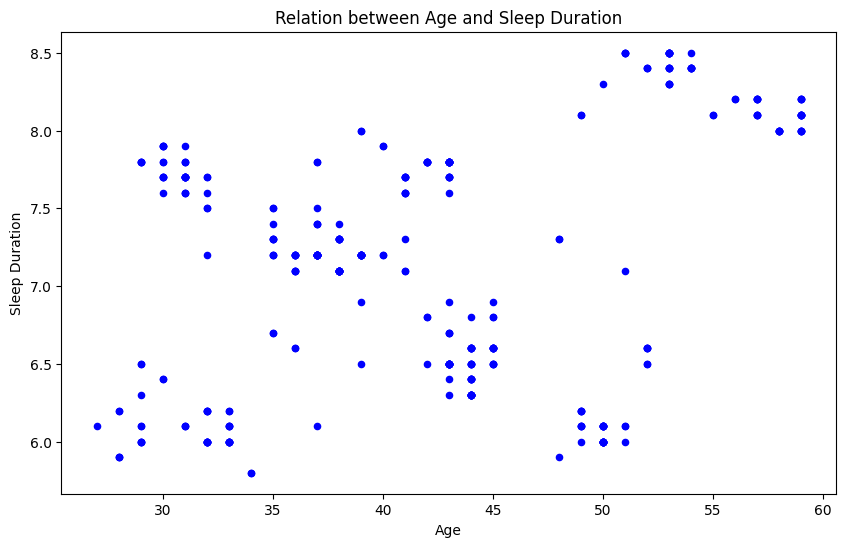

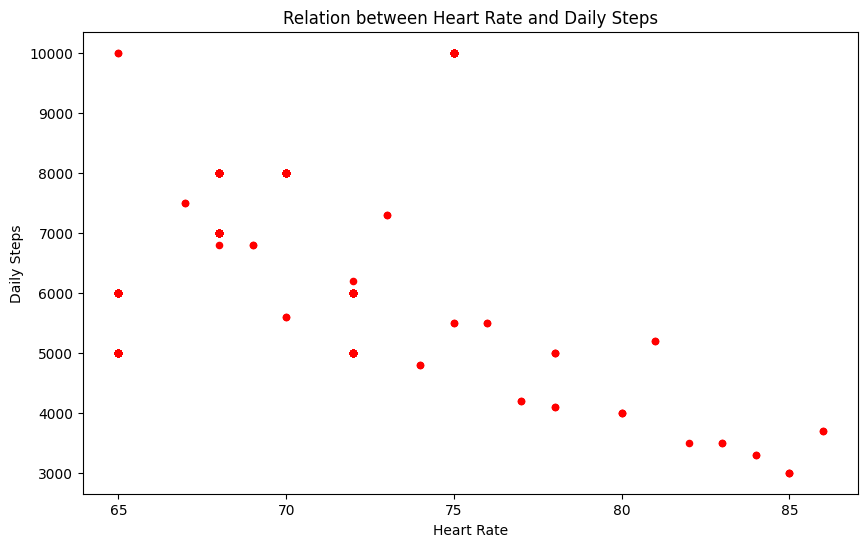

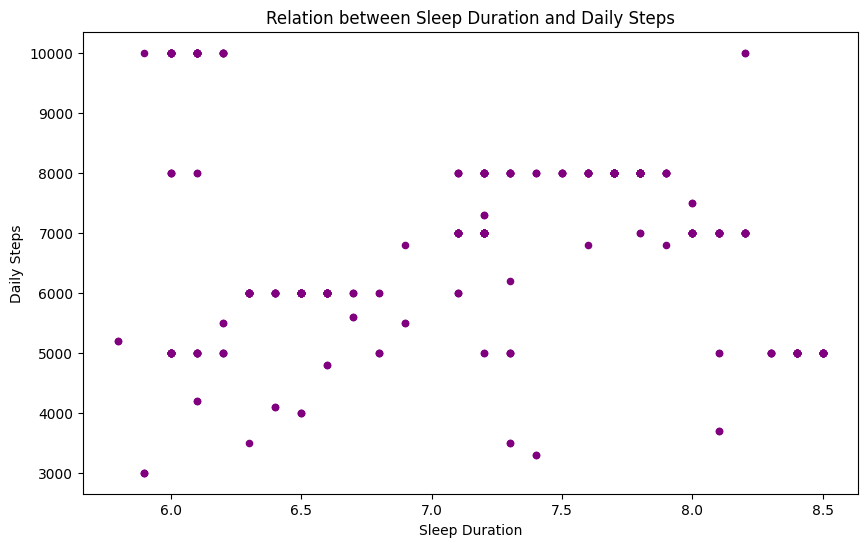

NameError: name 'start_time_pandas' is not defined

In [5]:
# Write your code for AIM #3 here
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time

start_time_pandas = time.time()
df = pd.read_csv('sleep_health.csv')

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title('Quality of Sleep Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], kde=True)
plt.title('Physical Activity Level Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], kde=True)
plt.title('Stress Level Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')
plt.show()

df.boxplot(column='Sleep Duration', by='Quality of Sleep', grid=False, figsize=(10, 6))
plt.title('Sleep Duration Distribution by Quality of Sleep')
plt.suptitle('')
plt.show()

df.boxplot(column='Sleep Duration', by='Stress Level', grid=False, figsize=(10, 6))
plt.title('Sleep Duration Distribution by Stress Level')
plt.suptitle('')
plt.show()

df.boxplot(column='Sleep Duration', by='Physical Activity Level', grid=False, figsize=(10, 6))
plt.title('Sleep Duration Distribution by Physical Activity Level')
plt.suptitle('')
plt.show()

df.boxplot(column='Sleep Duration', by='Occupation', grid=False, figsize=(10, 6))
plt.title('Sleep Duration Distribution by Occupation')
plt.suptitle('')
plt.show()

df.boxplot(column='Sleep Duration', by='BMI Category', grid=False, figsize=(10, 6))
plt.title('Sleep Duration Distribution by BMI')
plt.suptitle('')
plt.show()

df.plot(kind='scatter', x='Age', y='Sleep Duration', figsize=(10, 6), color='blue')
plt.title('Relation between Age and Sleep Duration')
plt.show()

df.plot(kind='scatter', x='Heart Rate', y='Daily Steps', figsize=(10, 6), color='red')
plt.title('Relation between Heart Rate and Daily Steps')
plt.show()

df.plot(kind='scatter', x='Sleep Duration', y='Daily Steps', figsize=(10, 6), color='purple')
plt.title('Relation between Sleep Duration and Daily Steps')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas
print(f'Time taken using Pandas: {pandas_time:.4f} seconds')
#To count unique values and their total count in a NumPy array, use 
# np.unique(array_name, return_counts=True)--- This will return two values, one is the unique values and the other is the total count of each unique value
# You will need this for plotting bar plots

start_time_numpy = time.time()

ages = df['Age'].to_numpy()
sleep_duration = df['Sleep Duration'].to_numpy()
quality_of_sleep = df['Quality of Sleep'].to_numpy()
physical_activity_level = df['Physical Activity Level'].to_numpy()
stress_level = df['Stress Level'].to_numpy()
heart_rate = df['Heart Rate'].to_numpy()
daily_steps = df['Daily Steps'].to_numpy()
occupation = df['Occupation'].to_numpy()
bmi_category = df['BMI Category'].to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, alpha=0.5, color='blue', density=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(sleep_duration, bins=20, alpha=0.5, color='green', density=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(quality_of_sleep, bins=20, alpha=0.5, color='orange', density=True)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(physical_activity_level, bins=20, alpha=0.5, color='purple', density=True)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(stress_level, bins=20, alpha=0.5, color='red', density=True)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(heart_rate, bins=20, alpha=0.5, color='cyan', density=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.show()

quality_unique = np.unique(quality_of_sleep)
sleep_duration_by_quality = [sleep_duration[quality_of_sleep == q] for q in quality_unique]

plt.figure(figsize=(10, 6))
plt.boxplot(sleep_duration_by_quality, labels=quality_unique)
plt.title('Sleep Duration Distribution by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()

stress_unique = np.unique(stress_level)
sleep_duration_by_stress = [sleep_duration[stress_level == s] for s in stress_unique]

plt.figure(figsize=(10, 6))
plt.boxplot(sleep_duration_by_stress, labels=stress_unique)
plt.title('Sleep Duration Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.show()

activity_unique = np.unique(physical_activity_level)
sleep_duration_by_activity = [sleep_duration[physical_activity_level == a] for a in activity_unique]

plt.figure(figsize=(10, 6))
plt.boxplot(sleep_duration_by_activity, labels=activity_unique)
plt.title('Sleep Duration Distribution by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.show()

occupation_unique = np.unique(occupation)
sleep_duration_by_occupation = [sleep_duration[occupation == o] for o in occupation_unique]

plt.figure(figsize=(10, 6))
plt.boxplot(sleep_duration_by_occupation, labels=occupation_unique)
plt.title('Sleep Duration Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.show()

bmi_unique = np.unique(bmi_category)
sleep_duration_by_bmi = [sleep_duration[bmi_category == b] for b in bmi_unique]

plt.figure(figsize=(10, 6))
plt.boxplot(sleep_duration_by_bmi, labels=bmi_unique)
plt.title('Sleep Duration Distribution by BMI')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ages, sleep_duration, color='blue', alpha=0.5)
plt.title('Relation between Age and Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(heart_rate, daily_steps, color='red', alpha=0.5)
plt.title('Relation between Heart Rate and Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(sleep_duration, daily_steps, color='purple', alpha=0.5)
plt.title('Relation between Sleep Duration and Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy
print(f'Time taken using NumPy: {numpy_time:.4f} seconds')


# For box plots in NumPy you will need to 
# create a list of variable1, grouped by the unique value of some variable2 (nominal or ordinal), 
# Syntax: variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

